In [1]:
import pynbody

import numpy as np

import matplotlib.pyplot as plt

import glob

import sys
sys.path.insert(0, '../util/')
from util import util

In [2]:
haloIDs = [431, 468, 492, 502, 523, 569, 597, 615]

In [3]:
# can we get velocity dispersion as a function of r?

20.67851253654098 24.95705933750487


<ipython-input-114-cdcd9e02ea45>:26: RuntimeWarning: invalid value encountered in divide
  sigmaOfR = sigmaOfR/numPerR


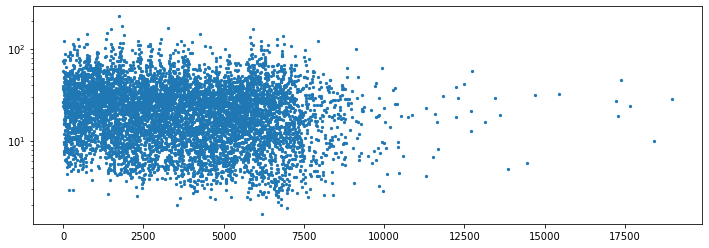

In [114]:
g = 0
hID = haloIDs[g]
fcdm = util.getfilepath(hID)[0]

s = pynbody.load(fcdm+'/r'+str(hID)+'.romulus25.3072g1HsbBH.004096')

s.physical_units()
h = s.halos()[1]

# center based on potential
cen_pot = pynbody.analysis.halo.center(h, mode='pot', retcen=True)
s['pos'] -= cen_pot

s_r = s.g['r']
s_vd = s.g['v_disp']

s_r_int = np.array(s_r, dtype=int)

sigmaOfR = np.zeros(max(s_r_int))
numPerR = np.zeros(max(s_r_int))

for idx,r in enumerate(s_r_int):
    sigmaOfR[r-1] += s_vd[r-1]
    numPerR[r-1] += 1
    
sigmaOfR = sigmaOfR/numPerR

rxaxis = np.linspace(0,max(s_r_int)-1,len(sigmaOfR))

fig = plt.figure(facecolor='w', figsize=(12,4))
plt.scatter(rxaxis, sigmaOfR, s=5)
#plt.xscale('log')
plt.yscale('log')

rxaxisFiltered = sigmaOfR[sigmaOfR>0]
sigmaFiltered = sigmaOfR[sigmaOfR>0]
vDispMed = np.median(sigmaFiltered[0:15000])
vDispMean = np.mean(sigmaFiltered[0:15000])
print(vDispMed, vDispMean)

In [91]:
s.all_keys()

['HII',
 'HeIII',
 'ne',
 'hetot',
 'hydrogen',
 'feh',
 'oxh',
 'ofe',
 'mgfe',
 'nefe',
 'sife',
 'c_s',
 'c_s_turb',
 'mjeans',
 'mjeans_turb',
 'ljeans',
 'ljeans_turb',
 'r',
 'rxy',
 'vr',
 'v2',
 'vt',
 'ke',
 'te',
 'j',
 'j2',
 'jz',
 'vrxy',
 'vcxy',
 'vphi',
 'vtheta',
 'v_mean',
 'v_disp',
 'v_curl',
 'vorticity',
 'v_div',
 'age',
 'u_mag',
 'u_lum_den',
 'b_mag',
 'b_lum_den',
 'v_mag',
 'v_lum_den',
 'r_mag',
 'r_lum_den',
 'i_mag',
 'i_lum_den',
 'j_mag',
 'j_lum_den',
 'h_mag',
 'h_lum_den',
 'k_mag',
 'k_lum_den',
 'U_mag',
 'U_lum_den',
 'B_mag',
 'B_lum_den',
 'V_mag',
 'V_lum_den',
 'R_mag',
 'R_lum_den',
 'I_mag',
 'I_lum_den',
 'J_mag',
 'J_lum_den',
 'H_mag',
 'H_lum_den',
 'K_mag',
 'K_lum_den',
 'theta',
 'alt',
 'az',
 'cs',
 'mu',
 'p',
 'u',
 'temp',
 'zeldovich_offset',
 'aform',
 'tform',
 'iord_argsort',
 'smooth',
 'rho',
 'H2',
 'rung',
 'amiga.grp',
 'lw',
 'vel',
 'massform',
 'uHot',
 'OxMassFrac',
 'HI',
 'u',
 'smoothlength',
 'OxMassFracdot',
 'p

In [92]:
s_r = s.g['r']
len(s.g['r'])

6714790

In [93]:
s_r

SimArray([2.91219658e+03, 1.76082924e+03, 1.48834929e+03, ...,
          1.65587309e+00, 7.38684814e+00, 4.56067663e+00], 'kpc')

In [94]:
s_vd = s.g['v_disp']
len(s_vd)

6714790

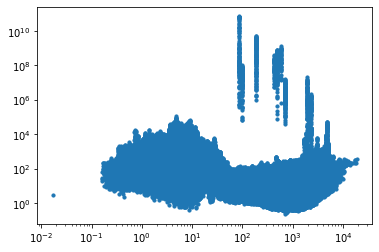

In [95]:
plt.scatter(s_r, s_vd, s=10)
plt.xscale('log')
plt.yscale('log')

In [96]:
s_r_int = np.array(s_r, dtype=int)

In [97]:
s_r_int

array([2912, 1760, 1488, ...,    1,    7,    4])

In [98]:
max(s_r_int)

18968

In [99]:
sigmaOfR = np.zeros(max(s_r_int))
numPerR = np.zeros(max(s_r_int))

for idx,r in enumerate(s_r_int):
    sigmaOfR[r-1] += s_vd[r-1]
    numPerR[r-1] += 1
    
sigmaOfR = sigmaOfR/numPerR

<ipython-input-99-e11dbb01680f>:8: RuntimeWarning: invalid value encountered in divide
  sigmaOfR = sigmaOfR/numPerR


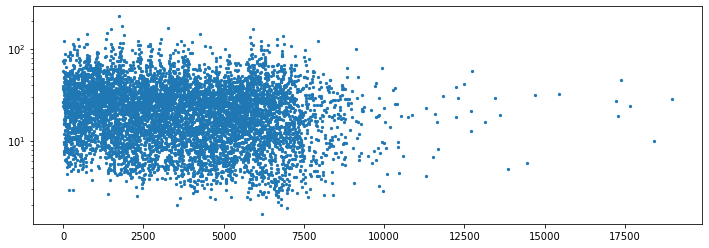

In [100]:
rxaxis = np.linspace(0,max(s_r_int)-1,len(sigmaOfR))

fig = plt.figure(facecolor='w', figsize=(12,4))
plt.scatter(rxaxis, sigmaOfR, s=5)
#plt.xscale('log')
plt.yscale('log')

In [101]:
rxaxisFiltered = sigmaOfR[sigmaOfR>0]
sigmaFiltered = sigmaOfR[sigmaOfR>0]
np.mean(sigmaFiltered[0:15000])

24.95705937386395

# Vdisp discussion with Alyson
* subtract systemic velocity
    *  either avg vel, or vel of the center of mass
* then find young stars and take their dispersion

In [6]:
# testing w gal 634
f = '/data/REPOSITORY/e11Gals/romulus_dwarf_zooms/r634.romulus25.3072g1HsbBH/r634.romulus25.3072g1HsbBH.004096'
f = f+'/r634.romulus25.3072g1HsbBH.004096'

In [7]:
sCDM = pynbody.load(f)

sCDM.physical_units()

hCDM = sCDM.halos(write_fpos=False)[1]
cen_pot = pynbody.analysis.halo.center(hCDM, mode='pot', retcen=True)
sCDM['pos'] -= cen_pot

pynbody.analysis.angmom.faceon(hCDM)

In [8]:
def compute_vdisp(velocities_all, masses_all, velocities_target, masses_target):
    center_of_mass_velocity = np.sum(velocities_all * masses_all[:, None], axis=0) / np.sum(masses_all)
    velocity_differences = velocities_target - center_of_mass_velocity
    velocity_differences_squared = np.sum(velocity_differences**2, axis=1)
    mass_weighted_disp = np.sqrt(np.sum(velocity_differences_squared * masses_target) / np.sum(masses_target))
    return mass_weighted_disp

In [9]:
vel_a = sCDM.s['vel']
mass_a = sCDM.s['mass']

agemask = sCDM.s['age'].in_units('Myr')<=10
vel_t = sCDM.s['vel'][agemask]
mass_t = sCDM.s['mass'][agemask]

In [10]:
center_of_mass_velocity = np.sum(vel_a * mass_a[:, None], axis=0) / np.sum(mass_a)
center_of_mass_velocity

SimArray([ 0.01141021, -0.92552942, -0.0826367 ], 'km s**-1')

In [11]:
compute_vdisp(vel_a, mass_a, vel_t, mass_t)

SimArray(72.09607535, 'km s**-1')

In [12]:
# how Alyson has been doing the calculation; std deviation
def compute_vdisp_std(sCDM):
    # this is COM velocity; systemic velocity
    v_CoM = np.sum(sCDM.s['vel'] * sCDM.s['mass'][:, None], axis=0) / np.sum(sCDM.s['mass'])
    
    # take young stars
    agemask = sCDM.s['age'].in_units('Myr')<10
    
    # difference from systemic velocity
    v_diffs = sCDM.s['vel'][agemask] -  v_CoM
    # take magnitude
    v_diffs_tot = np.linalg.norm(v_diffs, axis=1)
    
    return np.std(v_diffs_tot)

In [13]:
# average deviation of the deviation from systemic velocity
# which sorta makes sense bc the other definition is std dev
def compute_vdisp_mean(sCDM):
    v_CoM = np.sum(sCDM.s['vel'] * sCDM.s['mass'][:, None], axis=0) / np.sum(sCDM.s['mass'])

    agemask = sCDM.s['age'].in_units('Myr')<10
    mass_ys = sCDM.s['mass'][agemask]
    
    v_diffs = sCDM.s['vel'][agemask] - v_CoM
    v_diffs_tot = np.linalg.norm(v_diffs, axis=1)
    
    # difference from mean vdiff
    vdisp = np.sum((v_diffs_tot-np.mean(v_diffs_tot))**2)
    # divide by length for mean 
    vdisp = vdisp/len(v_diffs_tot)
    # sqrt
    vdisp = np.sqrt(vdisp)
    
    return vdisp

In [14]:
# fixed version of velocity weighted
def compute_vdisp_wtd(sCDM):
    v_CoM = np.sum(sCDM.s['vel'] * sCDM.s['mass'][:, None], axis=0) / np.sum(sCDM.s['mass'])

    agemask = sCDM.s['age'].in_units('Myr')<10
    mass_ys = sCDM.s['mass'][agemask]
    
    v_diffs = sCDM.s['vel'][agemask] - v_CoM
    v_diffs_tot = np.linalg.norm(v_diffs, axis=1)
    
    # mass weighted difference from mean vdiff 
    vdisp = np.sum( ((v_diffs_tot-np.mean(v_diffs_tot))**2) * mass_ys)
    # divide by total mass 
    vdisp = vdisp/np.sum(mass_ys)
    # sqrt 
    vdisp = np.sqrt(vdisp)
    
    return float(vdisp)

In [15]:
# systemic velocity can also be average star velocity
vx_sys = np.mean(sCDM.s['vel'][:,0])
vy_sys = np.mean(sCDM.s['vel'][:,1])
vz_sys = np.mean(sCDM.s['vel'][:,2])

In [16]:
compute_vdisp_std(sCDM)

17.737396055568148

In [17]:
compute_vdisp_mean(sCDM)

17.737396055568148

In [18]:
compute_vdisp_wtd(sCDM)

17.734426213969318

## Can we generalize the above to work with fire also 
* ie change args to be arrays of values

In [19]:
# std deviation based vdisp
def compute_vdisp_std(vel_all, mass_all, vel_t):
    # this is COM velocity; systemic velocity
    v_CoM = np.sum(vel_all * mass_all[:, None], axis=0) / np.sum(mass_all)
    
    # difference from systemic velocity
    v_diffs = vel_t - v_CoM
    # take magnitude
    v_diffs_tot = np.linalg.norm(v_diffs, axis=1)
    
    return np.std(v_diffs_tot)

In [20]:
# same as above but done manually
def compute_vdisp_mean(vel_all, mass_all, vel_t):
    v_CoM = np.sum(vel_all * mass_all[:, None], axis=0) / np.sum(mass_all)
    
    # difference from systemic velocity
    v_diffs = vel_t - v_CoM
    # take magnitude
    v_diffs_tot = np.linalg.norm(v_diffs, axis=1)
    
    # difference from mean vdiff
    vdisp = np.sum((v_diffs_tot-np.mean(v_diffs_tot))**2)
    # divide by length for mean 
    vdisp = vdisp/len(v_diffs_tot)
    # sqrt
    vdisp = np.sqrt(vdisp)
    
    return vdisp

In [21]:
# velocity weighted
def compute_vdisp_wtd(vel_all, mass_all, vel_t, mass_t):
    v_CoM = np.sum(vel_all * mass_all[:, None], axis=0) / np.sum(mass_all)
    
    # difference from systemic velocity
    v_diffs = vel_t - v_CoM
    # take magnitude
    v_diffs_tot = np.linalg.norm(v_diffs, axis=1)
    
    # mass weighted difference from mean vdiff 
    vdisp = np.sum( ((v_diffs_tot-np.mean(v_diffs_tot))**2) * mass_t)
    # divide by total mass 
    vdisp = vdisp/np.sum(mass_t)
    # sqrt 
    vdisp = np.sqrt(vdisp)
    
    return float(vdisp)

In [22]:
vel_all = sCDM.s['vel']
mass_all = sCDM.s['mass']

agemask = sCDM.s['age'].in_units('Myr')<10
vel_t = sCDM.s['vel'][agemask]
mass_t = sCDM.s['mass'][agemask]

In [23]:
compute_vdisp_std(vel_all, mass_all, vel_t)

17.737396055568148

In [24]:
compute_vdisp_mean(vel_all, mass_all, vel_t)

17.737396055568148

In [25]:
compute_vdisp_wtd(vel_all, mass_all, vel_t, mass_t)

17.734426213969318

## What about cold gas?
Is there a difference centering based on stars vs all gas?

In [26]:
cgmask = sCDM.g['temp']<1000
coldgasVel = sCDM.g['vel'][cgmask]
coldgasMass= sCDM.g['mass'][cgmask]

In [29]:
compute_vdisp_std(sCDM.s['vel'], sCDM.s['mass'], coldgasVel)

23.71790498794561

In [32]:
compute_vdisp_std(sCDM.g['vel'], sCDM.g['mass'], coldgasVel)

23.33521134511014